In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

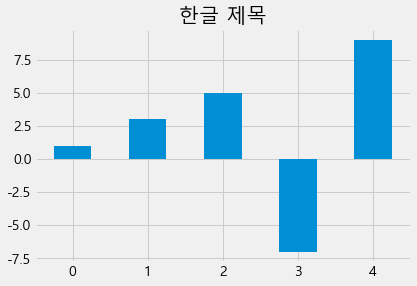

In [2]:
plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글 제목")
plt.xticks(rotation=0)

In [3]:
seoul_cancer = pd.read_csv('seoul_cancer.csv', encoding='utf-8-sig', header=1)

In [4]:
seoul_cancer.head(3)

,24개 암종,성별,연령군,항목,단위,1999 년,2000 년,2001 년,2002 년,2003 년,...,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년
0,모든 암(C00-C96),계,계,발생자수,명,101603,102690,112163,118466,125848,...,182470,196354,207980,222340,228093,228766,220131,217272,231236,232255.0
1,모든 암(C00-C96),계,계,연령군발생률,명/10만명,215.4,216,234.3,246.2,260.5,...,369.3,395.4,417,443.7,453.1,452.5,433.6,426.4,452.4,453.4
2,모든 암(C00-C96),계,0-4세,발생자수,명,536,506,557,542,516,...,467,488,498,495,506,459,460,458,459,391.0


In [7]:
cols = seoul_cancer.columns.tolist()
cols = [c.replace(' ', '') for c in cols]
cols

['24개암종',
 '성별',
 '연령군',
 '항목',
 '단위',
 '1999년',
 '2000년',
 '2001년',
 '2002년',
 '2003년',
 '2004년',
 '2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년']

In [9]:
seoul_cancer.columns = cols

In [10]:
# to filter out the percentage data
seoul_cancer = seoul_cancer[seoul_cancer['단위']=='명']

In [11]:
seoul_cancer.sample(3)

,24개암종,성별,연령군,항목,단위,1999년,2000년,2001년,2002년,2003년,...,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
656,간(C22),남자,35-39세,발생자수,명,387,342,326,261,326,...,241,230,205,235,180,185,178,157,133,140.0
1426,자궁경부(C53),여자,60-64세,발생자수,명,460,422,483,439,402,...,295,319,311,311,292,268,273,297,288,285.0
478,위(C16),여자,연령미상,발생자수,명,-,-,-,1,-,...,-,-,-,-,-,-,-,1,-,NaN


In [12]:
seoul_cancer.isnull().sum()

24개암종     0
성별        0
연령군       0
항목        0
단위        0
1999년     0
2000년     0
2001년     0
2002년     0
2003년     0
2004년     0
2005년     0
2006년     0
2007년     0
2008년     0
2009년     0
2010년     0
2011년     0
2012년     0
2013년     0
2014년     0
2015년     0
2016년     1
2017년    75
dtype: int64

In [13]:
seoul_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 2998
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   24개암종   1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령군     1500 non-null   object 
 3   항목      1500 non-null   object 
 4   단위      1500 non-null   object 
 5   1999년   1500 non-null   object 
 6   2000년   1500 non-null   object 
 7   2001년   1500 non-null   object 
 8   2002년   1500 non-null   object 
 9   2003년   1500 non-null   object 
 10  2004년   1500 non-null   object 
 11  2005년   1500 non-null   object 
 12  2006년   1500 non-null   object 
 13  2007년   1500 non-null   object 
 14  2008년   1500 non-null   object 
 15  2009년   1500 non-null   object 
 16  2010년   1500 non-null   object 
 17  2011년   1500 non-null   object 
 18  2012년   1500 non-null   object 
 19  2013년   1500 non-null   object 
 20  2014년   1500 non-null   object 
 21  2015년   1500 non-null   object 
 22  

In [14]:
seoul_cancer = seoul_cancer.fillna(0)
years = cols[5:]
seoul_cancer['2017년'] = seoul_cancer['2017년'].astype(int)

for i in years:
    temp = seoul_cancer[seoul_cancer[i].astype(str).str.contains(r'-', na=True)] 
    temp2 = seoul_cancer[seoul_cancer[i].astype(str).isin(['0', '0.0'])]
    print(i)
    print("# of record with 'dash':", len(temp))
    print("# of record with 0 patient:", len(temp2))
    print('=======================================')

1999년
# of record with 'dash': 71
# of record with 0 patient: 240
2000년
# of record with 'dash': 69
# of record with 0 patient: 224
2001년
# of record with 'dash': 75
# of record with 0 patient: 223
2002년
# of record with 'dash': 66
# of record with 0 patient: 232
2003년
# of record with 'dash': 71
# of record with 0 patient: 223
2004년
# of record with 'dash': 75
# of record with 0 patient: 236
2005년
# of record with 'dash': 75
# of record with 0 patient: 239
2006년
# of record with 'dash': 75
# of record with 0 patient: 229
2007년
# of record with 'dash': 302
# of record with 0 patient: 0
2008년
# of record with 'dash': 320
# of record with 0 patient: 0
2009년
# of record with 'dash': 301
# of record with 0 patient: 0
2010년
# of record with 'dash': 309
# of record with 0 patient: 0
2011년
# of record with 'dash': 75
# of record with 0 patient: 232
2012년
# of record with 'dash': 75
# of record with 0 patient: 236
2013년
# of record with 'dash': 75
# of record with 0 patient: 247
2014년
# of rec

In [15]:
seoul_cancer = seoul_cancer.replace(['-','0.0'], 0)

for i in years:
    temp = seoul_cancer[seoul_cancer[i].astype(str).str.contains(r'-', na=True)] 
    temp2 = seoul_cancer[seoul_cancer[i].astype(str).isin(['0', '0.0'])]
    print(i)
    print("# of record with 'dash':", len(temp))
    print("# of record with 0 patient:", len(temp2))
    print('=======================================')

1999년
# of record with 'dash': 0
# of record with 0 patient: 311
2000년
# of record with 'dash': 0
# of record with 0 patient: 293
2001년
# of record with 'dash': 0
# of record with 0 patient: 298
2002년
# of record with 'dash': 0
# of record with 0 patient: 298
2003년
# of record with 'dash': 0
# of record with 0 patient: 294
2004년
# of record with 'dash': 0
# of record with 0 patient: 311
2005년
# of record with 'dash': 0
# of record with 0 patient: 314
2006년
# of record with 'dash': 0
# of record with 0 patient: 304
2007년
# of record with 'dash': 0
# of record with 0 patient: 302
2008년
# of record with 'dash': 0
# of record with 0 patient: 320
2009년
# of record with 'dash': 0
# of record with 0 patient: 301
2010년
# of record with 'dash': 0
# of record with 0 patient: 309
2011년
# of record with 'dash': 0
# of record with 0 patient: 307
2012년
# of record with 'dash': 0
# of record with 0 patient: 311
2013년
# of record with 'dash': 0
# of record with 0 patient: 322
2014년
# of record with 'd

In [16]:
# convert to integer type to sum up later
seoul_cancer[years] = seoul_cancer[years].astype(int)

In [17]:
seoul_cancer.describe()

,1999년,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,541.885333,547.685333,598.202667,631.826667,671.189333,718.234667,784.997333,826.298667,896.14400,973.173333,1047.221333,1109.226667,1185.813333,1216.496000,1220.085333,1174.032000,1158.784000,1233.258667,1238.693333
std,3514.024197,3551.438299,3874.880257,4089.979619,4336.814619,4633.825011,5065.629822,5330.390034,5778.30376,6281.534523,6769.288210,7172.390614,7675.247914,7877.964332,7883.426961,7553.078614,7443.946567,7918.691912,7952.393399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.750000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,39.000000,40.000000,41.500000,42.000000,47.000000,47.000000,50.000000,49.000000,54.00000,56.000000,58.000000,58.000000,60.000000,61.000000,64.000000,65.500000,62.500000,70.000000,67.000000
75%,185.750000,193.000000,204.000000,218.250000,226.000000,234.250000,257.500000,281.250000,300.25000,309.250000,320.750000,344.000000,359.750000,370.000000,374.000000,387.250000,399.000000,409.000000,417.250000
max,101603.000000,102690.000000,112163.000000,118466.000000,125848.000000,134669.000000,147187.000000,154931.000000,168027.00000,182470.000000,196354.000000,207980.000000,222340.000000,228093.000000,228766.000000,220131.000000,217272.000000,231236.000000,232255.000000


In [18]:
df_04 = seoul_cancer[seoul_cancer['연령군'].isin(['0-4세'])].copy()
df_59 = seoul_cancer[seoul_cancer['연령군'].isin(['5-9세'])].copy()
df_59.index = df_04.index

In [19]:
plus_together = lambda x1, x2: x1 if x1.equals(x2) else x1+x2
df_0459 = df_04.combine(df_59, plus_together)
df_0459['연령군'] = '0-9세'
df_0459.head()

,24개암종,성별,연령군,항목,단위,1999년,2000년,2001년,2002년,2003년,...,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
2,모든 암(C00-C96),계,0-9세,발생자수,명,832,844,889,848,839,...,754,757,766,755,754,673,738,704,745,648
42,모든 암(C00-C96),남자,0-9세,발생자수,명,486,458,516,488,504,...,422,432,434,410,446,377,391,399,401,349
82,모든 암(C00-C96),여자,0-9세,발생자수,명,346,386,373,360,335,...,332,325,332,345,308,296,347,305,344,299
122,"입술, 구강 및 인두(C00-C14)",계,0-9세,발생자수,명,4,2,8,7,5,...,8,2,8,3,1,3,2,5,3,8
162,"입술, 구강 및 인두(C00-C14)",남자,0-9세,발생자수,명,1,0,5,5,2,...,5,2,5,1,1,1,2,4,2,2


In [20]:
seoul_cancer = seoul_cancer[~seoul_cancer['연령군'].isin(['0-4세', '5-9세'])]
seoul_cancer = pd.concat([seoul_cancer,df_0459]).sort_index()

In [23]:
# seoul_cancer.groupby(['24개암종','연령군']).mean().head(20)
seoul_cancer.head()

,24개암종,성별,연령군,항목,단위,1999년,2000년,2001년,2002년,2003년,...,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,모든 암(C00-C96),계,계,발생자수,명,101603,102690,112163,118466,125848,...,182470,196354,207980,222340,228093,228766,220131,217272,231236,232255
2,모든 암(C00-C96),계,0-9세,발생자수,명,832,844,889,848,839,...,754,757,766,755,754,673,738,704,745,648
6,모든 암(C00-C96),계,10-14세,발생자수,명,306,292,304,356,360,...,426,433,417,440,403,348,353,339,340,320
8,모든 암(C00-C96),계,15-19세,발생자수,명,524,522,526,483,501,...,617,604,675,662,661,687,673,658,703,603
10,모든 암(C00-C96),계,20-24세,발생자수,명,715,688,823,797,894,...,992,948,1024,1147,1223,1249,1224,1103,1273,1261


In [27]:
# seoul_cancer.to_csv('seoul_cancer_preprocessed.csv', index=False, encoding='cp949')
seoul_cancer.to_csv('seoul_cancer_preprocessed.csv', index=False, encoding='utf-8-sig')